In [1]:
#패키지
import SimpleITK as sitk
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import random
import pandas as pd


In [46]:
PATH_DATASET_CSV = '../Dataset/Dataset_with_path.csv'

df_dataset = pd.read_csv(PATH_DATASET_CSV)

In [47]:
df_dataset = df_dataset[['source','path','filename','group_maxinc','age']].dropna()

In [48]:
df_dataset

,source,path,filename,group_maxinc,age
0,OASIS-3,../Dataset/OASIS_BET/sub-OAS30001_sess-d0129_r...,sub-OAS30001_sess-d0129_run-02_T1w.nii,CN,65.0
1,OASIS-3,../Dataset/OASIS_BET/sub-OAS30001_sess-d0129_r...,sub-OAS30001_sess-d0129_run-01_T1w.nii,CN,65.0
2,OASIS-3,../Dataset/OASIS_BET/sub-OAS30002_ses-d0371_T1...,sub-OAS30002_ses-d0371_T1w.nii,CN,68.0
3,OASIS-3,../Dataset/OASIS_BET/sub-OAS30003_sess-d0558_r...,sub-OAS30003_sess-d0558_run-01_T1w.nii,CN,60.0
4,OASIS-3,../Dataset/OASIS_BET/sub-OAS30003_sess-d0558_r...,sub-OAS30003_sess-d0558_run-02_T1w.nii,CN,60.0
...,...,...,...,...,...
1358,ADNI,../Dataset/ADNI_BET/I26608.nii,I26608.nii,MCI,74.0
1365,ADNI,../Dataset/ADNI_BET/I14713.nii,I14713.nii,CN,80.0
1367,ADNI,../Dataset/ADNI_BET/I14155.nii,I14155.nii,AD,81.0
1368,ADNI,../Dataset/ADNI_BET/I12847.nii,I12847.nii,MCI,80.0


In [122]:
def read_dicom_file(source,filepath):
    """Read and load volume"""
    sitk_t1 = sitk.ReadImage(filepath)
    print('ORG_Direction',sitk_t1.GetDirection())
    #print('ORG_Origin',sitk_t1.GetOrigin())
    sitk_t1.SetDirection([1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0])
    #print('TOBE_Origin',sitk_t1.GetOrigin())
    print('TOBE_Direction',sitk_t1.GetDirection())

    image = sitk.GetArrayFromImage(sitk_t1)
    #oasis
    if source=='OASIS-3':
        image = image.transpose(1,2,0)
        image = ndimage.rotate(image,180,reshape=False)
        image = image[:,:,::-1]
    else:
        image = image.transpose(2,0,1)
    return image


def sample_stack(stack,rows=6,cols=6,start_with=10,show_every=5,subtitle='title'):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    plt.suptitle(subtitle)
    for i in range(rows*cols):
        ind = start_with = i*show_every
        ax[int(i / rows),int(i % rows)].set_title('slice %d'%ind)
        ax[int(i / rows),int(i % rows)].imshow(stack[:,:,ind],cmap='gray')
        ax[int(i / rows),int(i % rows)].axis('off')
    plt.show()


ORG_Direction (-0.9963491666573869, 0.06180987690090076, -0.0588886836391225, -0.06143143140072466, -0.9980774817303792, -0.008217032403225879, -0.059283364759337764, -0.004569417932304465, 0.9982307365122233)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(256, 176, 256)


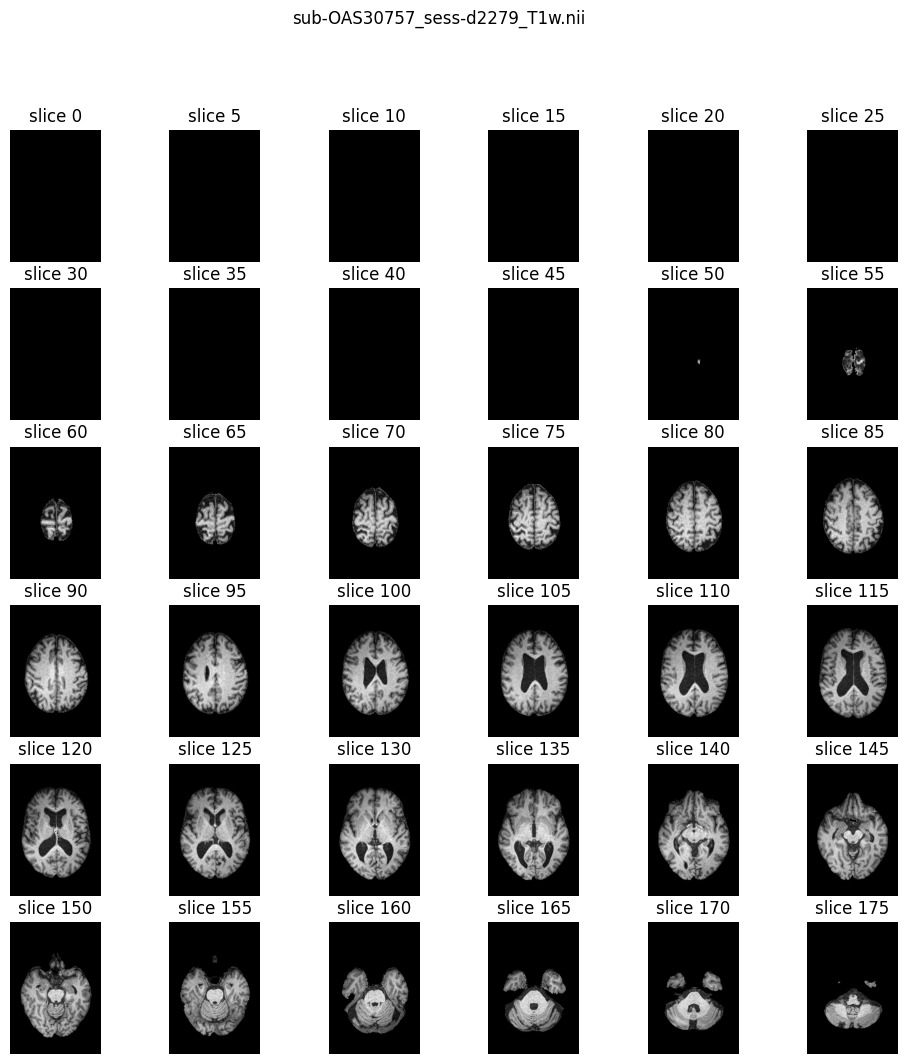

In [126]:
img_num=800
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)


ORG_Direction (-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(240, 160, 256)


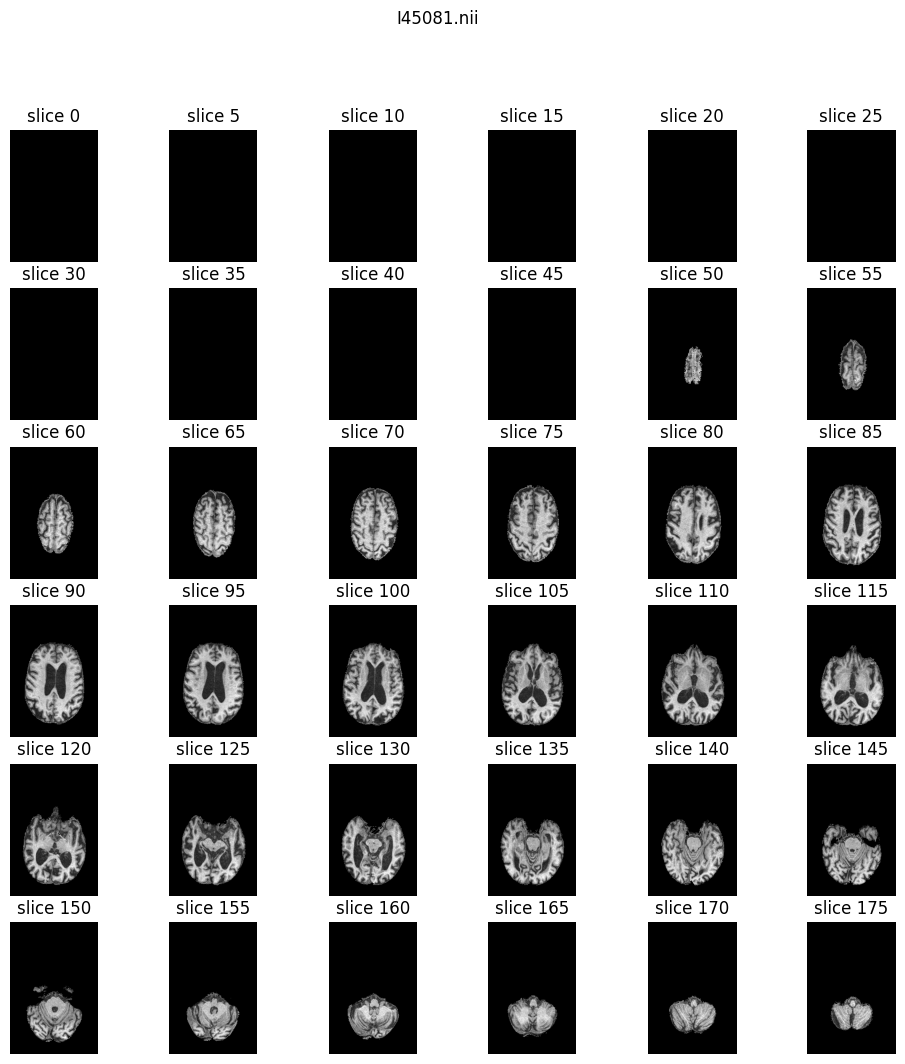

In [125]:
img_num=1280
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)
